# Comparing two options

In [29]:
import requests
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

formatter = mdates.DateFormatter("%Y-%m-%d")

In [30]:
target_contract = "SPY210707P00433000"
target_contract2 = "SPY210706P00433000"
req = requests.get("https://api.syncretism.io/historical/" + target_contract)
data = req.json()
req2 = requests.get("https://api.syncretism.io/historical/" + target_contract2)
data2 = req2.json()
data2 = data2[12:]

In [31]:
ts = [d["timestamp"] for d in data]
dates= [dt.datetime.fromtimestamp(t) for t in ts]
bid = [d["bid"] for d in data]
iv = [d["impliedVolatility"] for d in data]
stock_price = [d["regularMarketPrice"] for d in data]
theta = [d["theta"] for d in data]
vega = [d["vega"] for d in data]
print("Loaded " + str(len(ts)) + " ticks for " + target_contract)

ts2 = [d["timestamp"] for d in data2]
dates2 = [dt.datetime.fromtimestamp(t) for t in ts2]
bid2 = [d["bid"] for d in data2]
iv2 = [d["impliedVolatility"] for d in data2]
stock_price2 = [d["regularMarketPrice"] for d in data2]
theta2 = [d["theta"] for d in data2]
vega2 = [d["vega"] for d in data2]
print("Loaded " + str(len(ts2)) + " ticks for " + target_contract2)

Loaded 39 ticks for SPY210707P00433000
Loaded 39 ticks for SPY210706P00433000


## Theta

Theta is the rate at which the premium will decay as time passes.

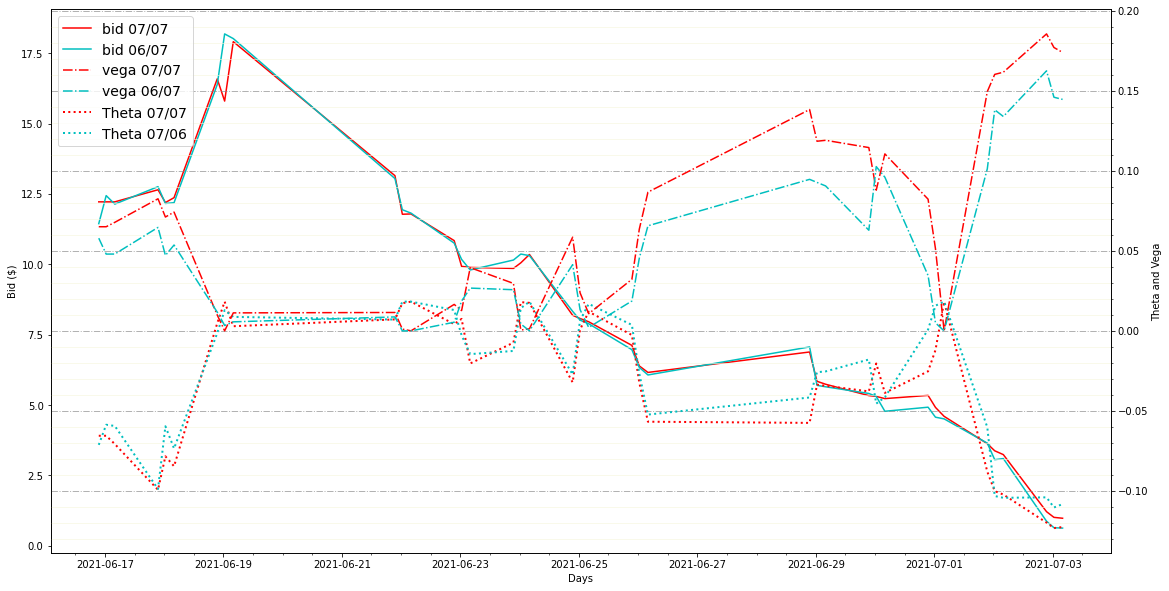

In [32]:
fig,ax = plt.subplots()
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel("Days")
ax.set_ylabel("Bid ($)")
line1, = ax.plot(dates, bid, 'r-', label='bid 07/07')
line2, = ax.plot(dates2, bid2, 'c-', label='bid 06/07')
ax2 = ax.twinx()
ax2.set_ylabel("Theta and Vega")
line5, = ax2.plot(dates, theta, 'r:', label='Theta 07/07', linewidth=2)
line6, = ax2.plot(dates2, theta2, 'c:', label='Theta 07/06', linewidth=2)
line3, = ax2.plot(dates, vega, 'r-.', label="vega 07/07")
line4, = ax2.plot(dates2, vega2, 'c-.', label="vega 06/07")
plt.legend(handles=[line1, line2, line3, line4, line5, line6], loc='upper left', fontsize=14)
#major grid lines
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='beige', alpha=0.6, ls='-', lw=1)
plt.rcParams['figure.figsize'] = [19, 10]
plt.show()